Νέες διαστάσεις δεδομένων εκπαίδευσης: (60000, 7, 7, 1)
Νέες διαστάσεις δεδομένων ελέγχου: (10000, 7, 7, 1)


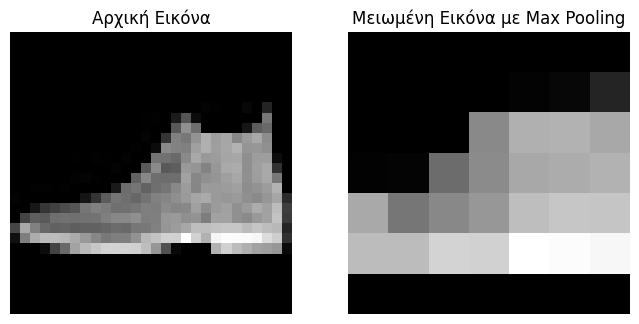

In [1]:
#Dimitriadis Georgios 5209
#Aristotelis Dhmitriou 5211
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.layers import Input, Dense, LeakyReLU
from keras.models import Model
# Φορτώνουμε τα δεδομένα Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Κανονικοποίηση των δεδομένων
train_images = train_images / 255.0
test_images = test_images / 255.0

# Προσθέτουμε μια διάσταση για το κανάλι των εικόνων 
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Ορίζουμε το max pooling layer με παράθυρο διάστασης 4x4
pooling_layer = MaxPooling2D(pool_size=(4, 4))

# Εφαρμόζουμε το max pooling στις εικόνες εκπαίδευσης
train_images_pooled = pooling_layer(train_images).numpy()

# Εφαρμόζουμε το max pooling στις εικόνες ελέγχου
test_images_pooled = pooling_layer(test_images).numpy()

# Εκτυπώνουμε τις νέες διαστάσεις των δεδομένων
print("Νέες διαστάσεις δεδομένων εκπαίδευσης:", train_images_pooled.shape)
print("Νέες διαστάσεις δεδομένων ελέγχου:", test_images_pooled.shape)
# Επιλέγουμε μια εικόνα από το σύνολο δεδομένων ελέγχου
sample_image = test_images[0]

# Εφαρμόζουμε το max pooling στην επιλεγμένη εικόνα
sample_image_pooled = pooling_layer(np.expand_dims(sample_image, axis=0)).numpy()[0]

# Εμφανίζουμε την αρχική εικόνα
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title('Αρχική Εικόνα')
plt.axis('off')

# Εμφανίζουμε τη μειωμένη εικόνα μετά το max pooling
plt.subplot(1, 2, 2)
plt.imshow(sample_image_pooled.squeeze(), cmap='gray')
plt.title('Μειωμένη Εικόνα με Max Pooling')
plt.axis('off')

plt.show()



In [2]:

# Δεδομένα εκπαίδευσης
X_train_flattened = train_images_pooled.reshape(train_images.shape[0], -1)
y_train = train_labels

# Δεδομένα ελέγχου
X_test_flattened = test_images_pooled.reshape(test_images.shape[0], -1)
y_test = test_labels

# Δημιουργία και εκπαίδευση του ταξινομητή
knn_classifier = KNeighborsClassifier(n_neighbors=3)  
knn_classifier.fit(X_train_flattened, y_train)

# Πρόβλεψη για τα δεδομένα ελέγχου
y_pred = knn_classifier.predict(X_test_flattened)

# Υπολογισμός ακρίβειας
accuracy = np.mean(y_pred == y_test)
print("Ακρίβεια:", accuracy)


Ακρίβεια: 0.7808


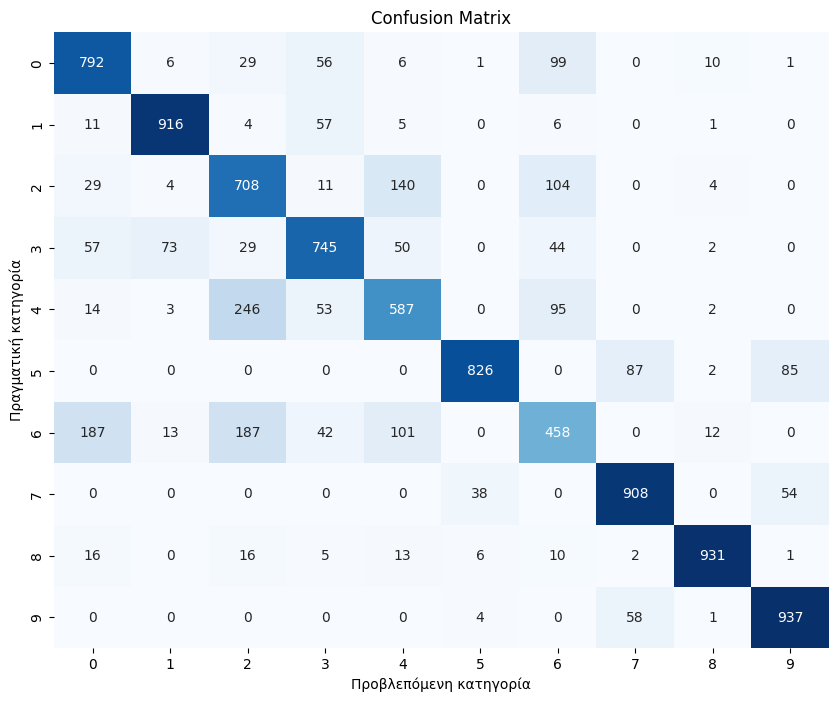

In [3]:

# Πρόβλεψη για τα δεδομένα ελέγχου
y_pred = knn_classifier.predict(X_test_flattened)

# Υπολογισμός του confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Εμφάνιση του confusion matrix χρησιμοποιώντας seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Προβλεπόμενη κατηγορία')
plt.ylabel('Πραγματική κατηγορία')
plt.title('Confusion Matrix')
plt.show()


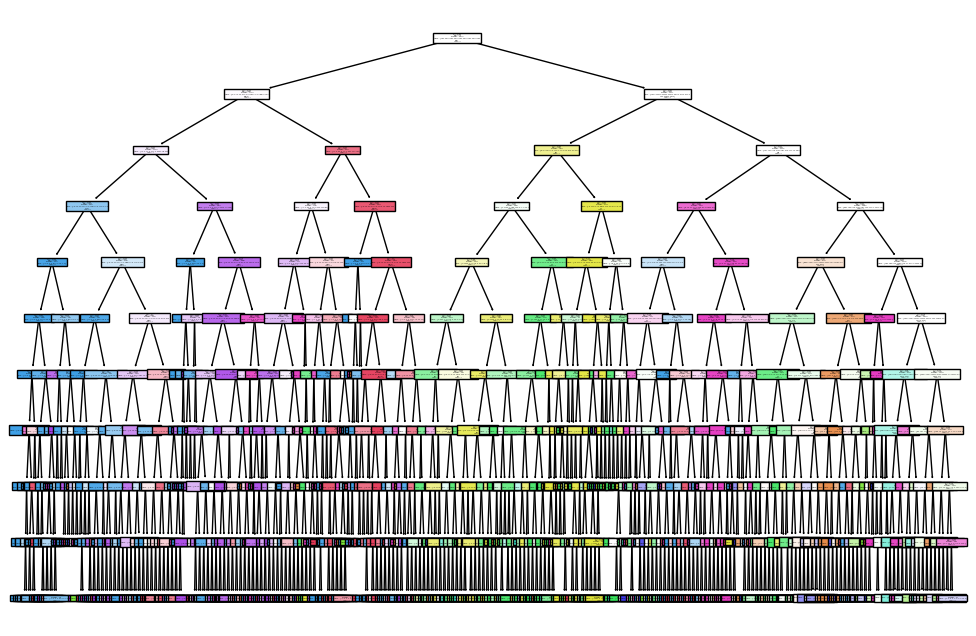

RandomForestClassifier()

In [4]:
# Δημιουργία και εκπαίδευση Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train_flattened, y_train)

# Plot του δέντρου απόφασης
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=[str(i) for i in range(49)], class_names=[str(i) for i in range(10)])
plt.show()

# Δημιουργία και εκπαίδευση Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_flattened, y_train)


C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM με C=1: Ακρίβεια = 0.42


C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM με C=10: Ακρίβεια = 0.44


C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM με C=100: Ακρίβεια = 0.49


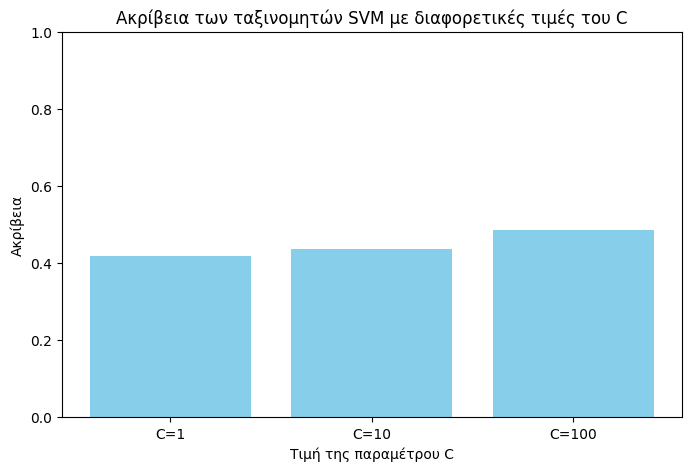

In [5]:
# Κανονικοποίηση των δεδομένων
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

# Δημιουργία και εκπαίδευση των ταξινομητών SVM με διαφορετικές τιμές της παραμέτρου C
C_values = [1, 10, 100]
accuracies = []

for C in C_values:
    # Δημιουργία και εκπαίδευση του ταξινομητή SVM
    svm_classifier = SVC(kernel='linear', C=C, max_iter=500)
    svm_classifier.fit(X_train_scaled, y_train)

    # Προβλέψεις στα δεδομένα ελέγχου
    y_pred = svm_classifier.predict(X_test_scaled)

    # Υπολογισμός ακρίβειας
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Εκτύπωση της ακρίβειας
    print(f"SVM με C={C}: Ακρίβεια = {accuracy:.2f}")

# Σχεδίαση σχηματικού τεστ
plt.figure(figsize=(8, 5))
plt.bar(['C=1', 'C=10', 'C=100'], accuracies, color='skyblue')
plt.xlabel('Τιμή της παραμέτρου C')
plt.ylabel('Ακρίβεια')
plt.title('Ακρίβεια των ταξινομητών SVM με διαφορετικές τιμές του C')
plt.ylim(0, 1)
plt.show()


C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C = 1 , gamma = 0.02 , Accuracy: 0.6178


C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C = 1 , gamma = 0.1 , Accuracy: 0.695


C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C = 1 , gamma = 1 , Accuracy: 0.6582


C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C = 10 , gamma = 0.02 , Accuracy: 0.6689


C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C = 10 , gamma = 0.1 , Accuracy: 0.7033


C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C = 10 , gamma = 1 , Accuracy: 0.4534


C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C = 100 , gamma = 0.02 , Accuracy: 0.6019


C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C = 100 , gamma = 0.1 , Accuracy: 0.6126


C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


C = 100 , gamma = 1 , Accuracy: 0.4514


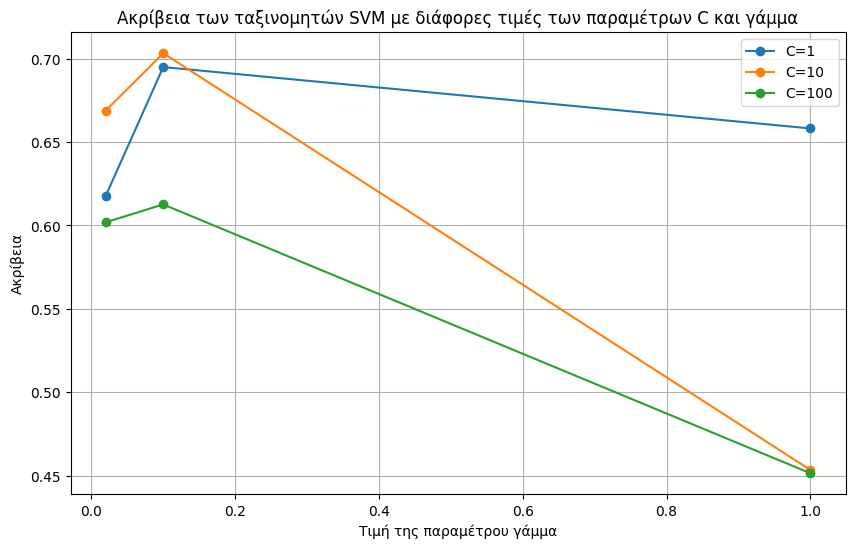

In [6]:
# Δημιουργία των ταξινομητών SVM με διαφορετικές τιμές της παραμέτρου C
C_values = [1, 10, 100]
gamma_value = [0.02, 0.1, 1]
accuracies = []

for C in C_values:
    accuracies_C = []
    for gamma in gamma_value:
        # Δημιουργία του ταξινομητή SVM
        svm_classifier = SVC(C=C, kernel='rbf', gamma=gamma, max_iter=500)
        
        # Εκπαίδευση του ταξινομητή
        svm_classifier.fit(X_train_scaled, y_train)
        
        # Πρόβλεψη των ετικετών για τα δεδομένα ελέγχου
        y_pred = svm_classifier.predict(X_test_scaled)
        
        # Υπολογισμός της ακρίβειας του ταξινομητή
        accuracy = accuracy_score(y_test, y_pred)
        accuracies_C.append(accuracy)
        # Εκτύπωση της ακρίβειας και των παραμέτρων του ταξινομητή
        print("C =", C, ", gamma =", gamma, ", Accuracy:", accuracy)
    accuracies.append(accuracies_C)


plt.figure(figsize=(10, 6))

for i, C in enumerate(C_values):
    plt.plot(gamma_value, accuracies[i], marker='o', label=f'C={C}')

plt.xlabel('Τιμή της παραμέτρου γάμμα')
plt.ylabel('Ακρίβεια')
plt.title('Ακρίβεια των ταξινομητών SVM με διάφορες τιμές των παραμέτρων C και γάμμα')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


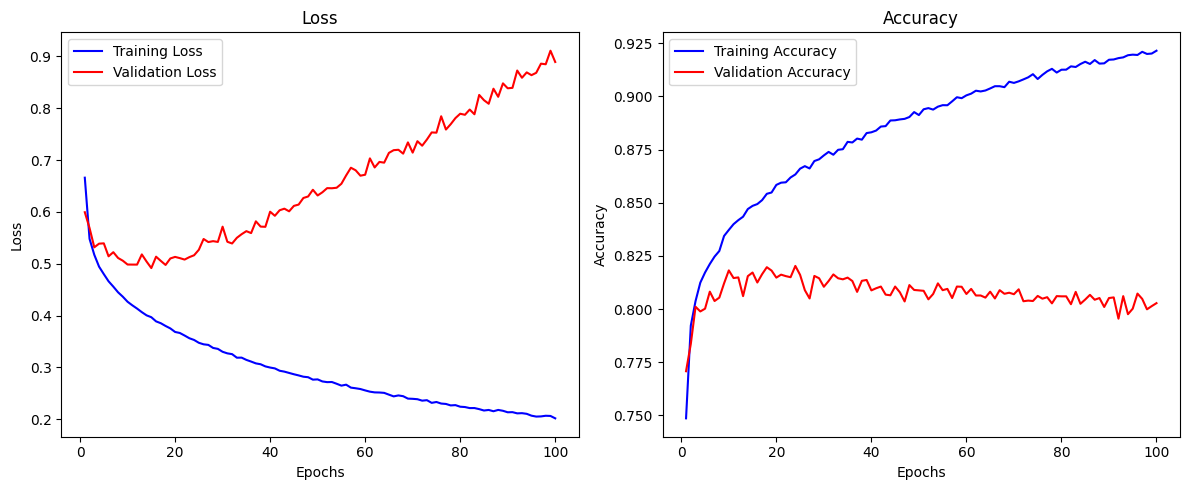

Το συνολικό πλήθος των παραμέτρων του μοντέλου είναι: 20660


In [7]:

# Ορισμός του επιπέδου εισόδου
input_layer = Input(shape=(49,))

# Ορισμός των κρυφών επιπέδων
hidden_layer1 = Dense(100)(input_layer)
activation1 = LeakyReLU(alpha=0.1)(hidden_layer1)

hidden_layer2 = Dense(100)(activation1)
activation2 = LeakyReLU(alpha=0.1)(hidden_layer2)

hidden_layer3 = Dense(50)(activation2)
activation3 = LeakyReLU(alpha=0.1)(hidden_layer3)

# Ορισμός του επιπέδου εξόδου
output_layer = Dense(10, activation='softmax')(activation3)

# Δημιουργία του μοντέλου
model = Model(inputs=input_layer, outputs=output_layer)




# Σύνολο εκπαίδευσης του μοντέλου
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Εκπαίδευση του μοντέλου
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=50, validation_data=(X_test_scaled, y_test), verbose=0)

# Αποθήκευση των μετρικών του μοντέλου
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Εμφάνιση της τιμής της συνάρτησης απώλειας και του accuracy
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Εκτύπωση του πλήθους των παραμέτρων του μοντέλου
print("Το συνολικό πλήθος των παραμέτρων του μοντέλου είναι:", model.count_params())

C:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │         921,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 941,526 (3.59 MB)

 Trainable params: 941,526 (3.59 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7859 - loss: 0.6058 - val_accuracy: 0.8927 - val_loss: 0.2960
Epoch 2/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8941 - loss: 0.2911 - val_accuracy: 0.9037 - val_loss: 0.2568
Epoch 3/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9123 - loss: 0.2395 - val_accuracy: 0.9143 - val_loss: 0.2375
Epoch 4/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9263 - loss: 0.1976 - val_accuracy: 0.9148 - val_loss: 0.2313
Epoch 5/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9358 - loss: 0.1692 - val_accuracy: 0.9225 - val_loss: 0.2202
Epoch 6/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9431 - loss: 0.1504 - val_accuracy: 0.9228 - val_loss: 0.2282
Epoch 7/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9543 - loss: 0.1228 - val_accuracy: 0.9240 - val_loss: 0.2267
Epoch 8/100
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 

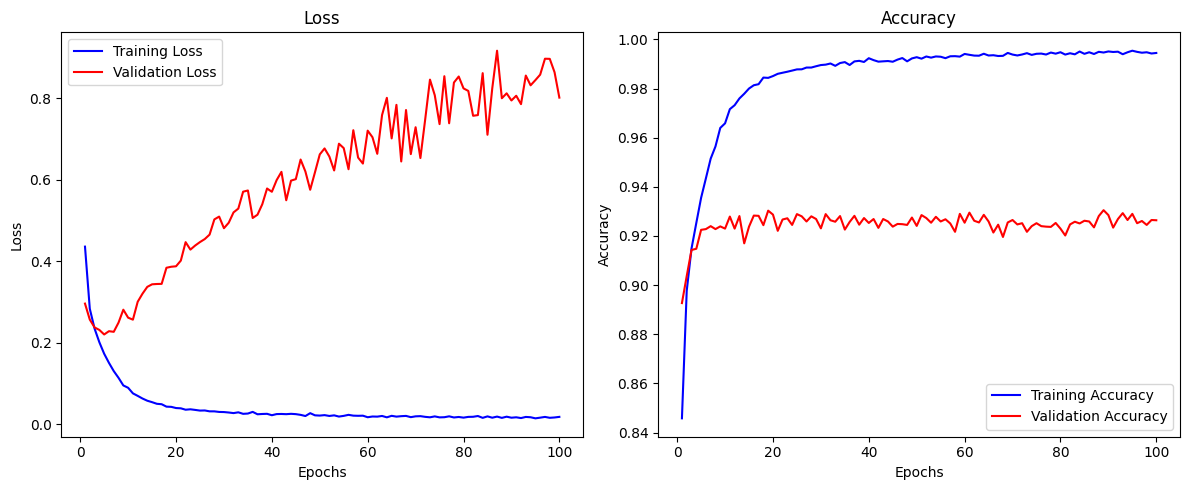

In [8]:
# Φόρτωση των δεδομένων
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Κανονικοποίηση των τιμών των pixel στο διάστημα [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Προσθήκη ενός διαστάσεων στα δεδομένα για το κανάλι χρώματος (γιατί τα δεδομένα είναι ασπρόμαυρα)
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]




# Δημιουργία του μοντέλου
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Επισκόπηση του μοντέλου
model.summary()
# Σύνθεση του μοντέλου
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Εκπαίδευση του μοντέλου
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_test, y_test), verbose=1)
import matplotlib.pyplot as plt

# Αποθήκευση των μετρικών του μοντέλου
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Εμφάνιση της τιμής της συνάρτησης απώλειας και του accuracy
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
